# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

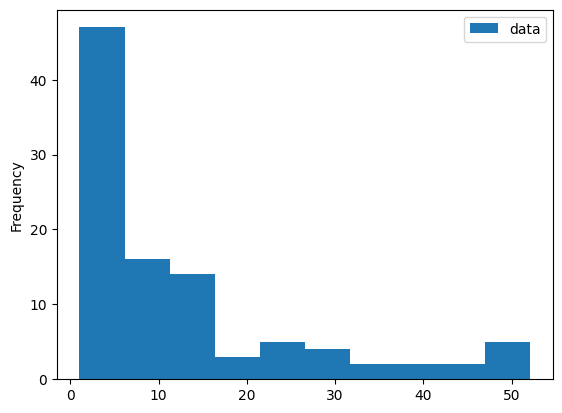

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

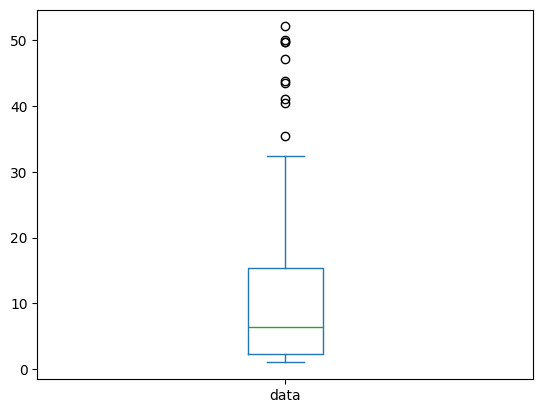

In [3]:
df.plot.box()

The advantages of the representation of the first chart is that you can clearly identify a numerical frequency of the cost of the drugs, for example, that 40+ drugs cost between $1-5. Additionally, it gives a good distribution of the frequency of the drug cost, skewed right. A disadvantage of this chart is that the bins are not completely clear.
<br>
<br>
The advantage of the representation of the second chart is that you can identify in percentages/quartiles the frequency of different drug cost bins. Additionally, it is easier to identify outliers and the median. A disadvantage of the representation in the second chart is that it is not immediately apparent to the untrained eye what the box represents.
<br>
<br>
Second, I would modify these graphs by clearing labeling each axis and providing a chart title. Based on the administrator's use case, I may also add a threshold or color code based on that.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [4]:
import matplotlib.pyplot as plt

In [5]:
df_loan = pd.read_csv("Loan_Default_Data_Train.csv")

In [46]:
df_loan.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default,Income_Bin,DTI_bin
0,95074,421802,II,>10yrs,Vfied,"633,600.00",MORTGAGE,0,0,GLENDALE NISSAN,...,17,"58,598.00",3 years,"31,216.05",debt consolidation,I,0.00,0,150k+,NaN
1,134131,3964312,IV,7yrs,Source Verified,"85,483.20",RENT,0,0,Business Teacher,...,15,"18,924.00",5 years,"11,660.49",debt consolidation,I,0.00,0,75–100k,NaN
2,92602,4247560,III,<1yr,Source Verified,"79,200.00",RENT,0,0,driver,...,7,"15,604.00",5 years,"5,637.87",major purchase,I,0.00,0,75–100k,NaN
3,22591,197179,III,<1yr,Vfied,"61,600.00",RENT,0,0,AvePoint,...,9,"22,410.00",3 years,"15,607.17",major purchase,I,0.00,1,50–75k,NaN
4,125060,4646684,V,2yrs,Source Verified,"68,053.92",RENT,0,0,Lead Tester,...,10,"36,022.00",5 years,"27,472.86",debt consolidation,I,0.00,0,50–75k,NaN


In [29]:
df_loan_relevant = df_loan[["Yearly_Income", "Unpaid_2_years", "Debt_to_Income", "Lend_Amount", "Interest_Charged", "Usage_Rate", "Inquiries", "Present_Balance", "Gross_Collection", "Account_Open", "Total_Unpaid_CL", "Unpaid_Amount"]]
df_loan_relevant.head()

,Yearly_Income,Unpaid_2_years,Debt_to_Income,Lend_Amount,Interest_Charged,Usage_Rate,Inquiries,Present_Balance,Gross_Collection,Account_Open,Total_Unpaid_CL,Unpaid_Amount
0,"633,600.00",0,12.55,"42,023.25",15.39,88.92,3,"607,161.90",0.00,17,"58,598.00","31,216.05"
1,"85,483.20",0,9.00,"38,133.00",9.94,102.86,0,"269,234.06",0.00,15,"18,924.00","11,660.49"
2,"79,200.00",0,24.91,"17,100.00",22.35,60.37,0,"22,476.53",0.00,7,"15,604.00","5,637.87"
3,"61,600.00",0,16.58,"5,130.00",10.36,116.27,1,"15,242.09",0.00,9,"22,410.00","15,607.17"
4,"68,053.92",0,40.05,"19,665.00",13.68,127.28,1,"65,433.94",0.00,10,"36,022.00","27,472.86"


In [30]:
df_loan_relevant.mean()

Yearly_Income      134,859.63
Unpaid_2_years           0.33
Debt_to_Income          30.94
Lend_Amount         25,920.54
Interest_Charged        16.52
Usage_Rate              95.52
Inquiries                0.67
Present_Balance    236,389.46
Gross_Collection        39.46
Account_Open            12.78
Total_Unpaid_CL     53,268.64
Unpaid_Amount       29,556.49
dtype: float64

In [31]:
df_loan_relevant.median()

Yearly_Income      114,400.00
Unpaid_2_years           0.00
Debt_to_Income          30.14
Lend_Amount         23,940.00
Interest_Charged        16.49
Usage_Rate              97.01
Inquiries                0.00
Present_Balance    138,806.23
Gross_Collection         0.00
Account_Open            12.00
Total_Unpaid_CL     39,674.00
Unpaid_Amount       20,892.78
dtype: float64

In [32]:
df_loan_relevant.mode()

,Yearly_Income,Unpaid_2_years,Debt_to_Income,Lend_Amount,Interest_Charged,Usage_Rate,Inquiries,Present_Balance,Gross_Collection,Account_Open,Total_Unpaid_CL,Unpaid_Amount
0,"105,600.00",0.00,22.98,"17,100.00",14.56,0.00,0.00,0.00,0.00,11.00,"24,070.00",0.00
1,NaN,NaN,28.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


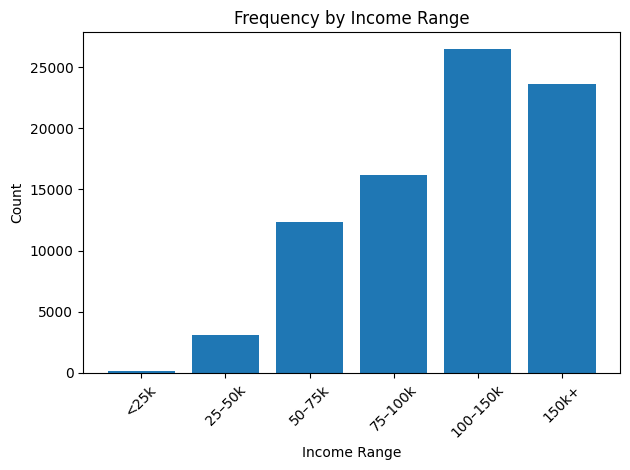

In [42]:
df_loan["Yearly_Income"].dropna()
df_loan["Income_Bin"] = pd.cut(df_loan["Yearly_Income"], bins=[0, 25000, 50000, 75000, 100000, 150000, float("inf")],
                               labels=["<25k", "25–50k", "50–75k", "75–100k", "100–150k", "150k+"])

income_counts = df_loan["Income_Bin"].value_counts().sort_index()

plt.bar(income_counts.index.astype(str), income_counts.values)
plt.title("Frequency by Income Range")
plt.xlabel("Income Range")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

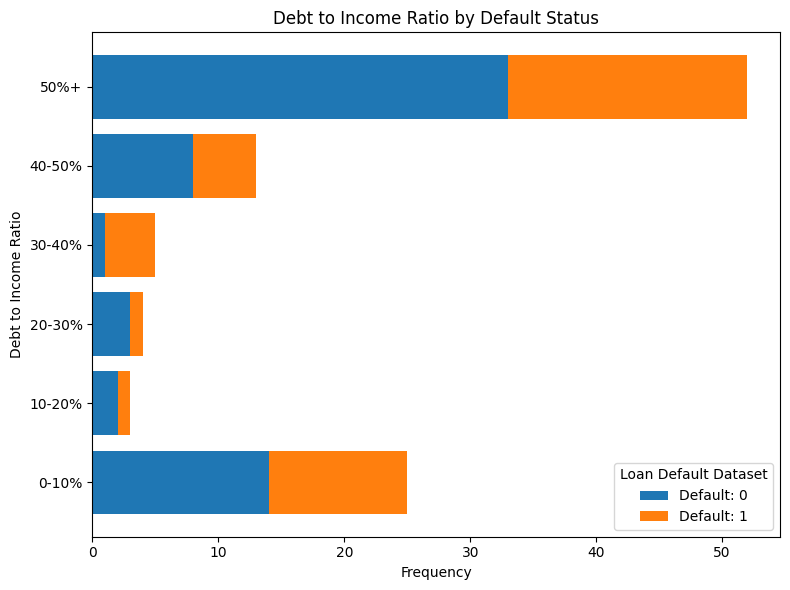

In [48]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1]
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50%+']
df_loan['DTI_bin'] = pd.cut(df_loan['Debt_to_Income'], bins=bins, labels=labels, right=False)

grouped = df_loan.groupby(['DTI_bin', 'Default'], observed=True).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(8, 6))

bottom = None
for col in grouped.columns:
    ax.barh(grouped.index, grouped[col], left=bottom, label=f'Default: {col}')
    if bottom is None:
        bottom = grouped[col]
    else:
        bottom += grouped[col]

ax.set_xlabel('Frequency')
ax.set_ylabel('Debt to Income Ratio')
ax.set_title('Debt to Income Ratio by Default Status')
ax.legend(title='Loan Default Dataset')

plt.tight_layout()
plt.show()